# Python Programming Tutorials (Computer Science)

The 🦉 [Socratica](https://www.youtube.com/channel/UCW6TXMZ5Pq6yL6_k5NZ2e0Q) YouTube Channel has a 33-video [playlist](https://www.youtube.com/playlist?list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-) devoted to the introduction of Python.

## #24 Python and Prime Numbers

In [24]:
%run video-00.py

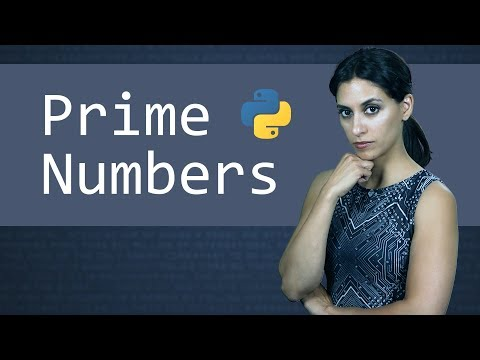

In [25]:
from IPython import display

video = display.YouTubeVideo('2p3kwF04xcA')
video
display.HTML(f'<a href="{video.src}">link</a>')

According to [Wikipedia](https://en.wikipedia.org/wiki/Prime_number),

>A prime number (or a prime) is a natural number greater than 1 that is not a product of two smaller natural numbers.

We can write a function to scan a range of integers (natural numbers plus zero) to test them for primality:

In [26]:
def is_prime_v1(n):
    '''Return `True` when `n` is prime; otherwise `False`.'''

    if n == 1:
        return False # unit or unity
    
    for x in range(2, n): # check smaller numbers against `n`
        if n % x == 0:
            return False # composite

    return True # prime

for n in range(1, 21):
    print(n, ':', is_prime_v1(n))

1 : False
2 : True
3 : True
4 : False
5 : True
6 : False
7 : True
8 : False
9 : False
10 : False
11 : True
12 : False
13 : True
14 : False
15 : False
16 : False
17 : True
18 : False
19 : True
20 : False


The `for` loop inside of `is_prime_v1()` looks like it will contribute greatly to time complexity as `n` increases. Let us examine this with `time`:

In [27]:
import time

def test(upper_bound):

    t0 = time.time()

    for n in range(1, upper_bound):
        is_prime_v1(n)

    t1 = time.time()

    print('upper_bound:', upper_bound)
    print('time required:', t1 - t0)

test(21)
test(2001)
test(20001)
test(40001)
test(60001)
test(80001)

upper_bound: 21
time required: 9.298324584960938e-06
upper_bound: 2001
time required: 0.06702756881713867
upper_bound: 20001
time required: 2.488121271133423
upper_bound: 40001
time required: 9.138916492462158
upper_bound: 60001
time required: 17.188812971115112
upper_bound: 80001
time required: 26.001378774642944


As the upper bound doubles, the time required is approximately doubling as well!

[We have used memoization](https://github.com/BryanWilhite/guido-van-r-snake/blob/master/socratica/video-18.ipynb) previously to reduce time complexity but this may not help here as computation is not significantly slower than retrieval.

We might be able to draw upon our limited knowledge of [number theory](https://en.wikipedia.org/wiki/Number_theory), starting with this graphic:

In [28]:
%%html
<img src="./video-24.png" />

By limiting our scans to $\sqrt{n} \times \sqrt{n}$, we should be able to cut computations in half.

Let us define a new function:

In [29]:
import math

def is_prime_v2(n):
    '''Return `True` when `n` is prime; otherwise `False`.'''

    if n == 1:
        return False # unit or unity
    
    max_divisor = math.floor(math.sqrt(n))
    for x in range(2, max_divisor + 1): # number theory in action!
        if n % x == 0:
            return False # composite

    return True # prime

for n in range(1, 21):
    print(n, ':', is_prime_v1(n))

1 : False
2 : True
3 : True
4 : False
5 : True
6 : False
7 : True
8 : False
9 : False
10 : False
11 : True
12 : False
13 : True
14 : False
15 : False
16 : False
17 : True
18 : False
19 : True
20 : False


And the time trial for our new function:

In [30]:
def test(upper_bound):

    t0 = time.time()

    for n in range(1, upper_bound):
        is_prime_v2(n)

    t1 = time.time()

    print('upper_bound:', upper_bound)
    print('time required:', t1 - t0)

test(21)
test(2001)
test(20001)
test(40001)
test(60001)
test(80001)

upper_bound: 21
time required: 1.4781951904296875e-05
upper_bound: 2001
time required: 0.001306772232055664
upper_bound: 20001
time required: 0.07878589630126953
upper_bound: 40001
time required: 0.22698068618774414
upper_bound: 60001
time required: 0.2006385326385498
upper_bound: 80001
time required: 0.19527935981750488


Quite impressive! Now that we are excited about numbers, we realize another property: although $2$ is a prime number, any other number composed with $2$ cannot be a prime number—and _all_ even numbers greater than $2$ are composed with $2$.

This revelation means we need to stop checking all even numbers greater than $2$:

In [32]:
def is_prime_v3(n):
    '''Return `True` when `n` is prime; otherwise `False`.'''

    if n == 1:
        return False # unit or unity

    if n == 2:
        return True # the only even prime number

    if n > 2 and n % 2 == 0:
        return False # all other even numbers
    
    max_divisor = math.floor(math.sqrt(n))
    for x in range(3, max_divisor + 1, 2): # step over evens
        if n % x == 0:
            return False # composite

    return True # prime

for n in range(1, 21):
    print(n, ':', is_prime_v3(n))

1 : False
2 : True
3 : True
4 : False
5 : True
6 : False
7 : True
8 : False
9 : False
10 : False
11 : True
12 : False
13 : True
14 : False
15 : False
16 : False
17 : True
18 : False
19 : True
20 : False


In [33]:
def test(upper_bound):

    t0 = time.time()

    for n in range(1, upper_bound):
        is_prime_v3(n)

    t1 = time.time()

    print('upper_bound:', upper_bound)
    print('time required:', t1 - t0)

test(21)
test(2001)
test(20001)
test(40001)
test(60001)
test(80001)

upper_bound: 21
time required: 1.1444091796875e-05
upper_bound: 2001
time required: 0.0057697296142578125
upper_bound: 20001
time required: 0.040704965591430664
upper_bound: 40001
time required: 0.04546523094177246
upper_bound: 60001
time required: 0.05005002021789551
upper_bound: 80001
time required: 0.1026461124420166


More impressive! The `for` loop inside `is_prime_v3` is scanning less than half of all integers!

Daring to continue along this path of excitement might lead us toward the realm of the [_pseudoprime_](https://en.wikipedia.org/wiki/Pseudoprime).